In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iowa-liquor-sales-eda/Iowa_Liquor_Sales.csv


In [2]:
df = '/kaggle/input/iowa-liquor-sales-eda/Iowa_Liquor_Sales.csv'

In [3]:
uni_set = pd.read_csv(df, nrows = 2500000)
print(uni_set.dtypes)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Invoice/Item Number       object
Date                      object
Store Number               int64
Store Name                object
Address                   object
City                      object
Zip Code                  object
Store Location            object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number            float64
Vendor Name               object
Item Number                int64
Item Description          object
Pack                       int64
Bottle Volume (ml)         int64
State Bottle Cost        float64
State Bottle Retail      float64
Bottles Sold               int64
Sale (Dollars)           float64
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object


In [4]:
# uni_zip = [50011, 50112, 50125, 50140, 50219, 50311, 50316, 50436, 50588, 50614, 50677, 51041, 51104, 51106, 51250, 52001, 52004, 52101, 52142, 52242, 52314,
#            52402, 52577, 52803]

uni_zip = ['50011', '50112', '50125', '50140', '50219', '50311', '50316', '50436', '50588', '50614', '50677', '51041', '51104', '51106', '51250', '52001', 
           '52004', '52101', '52142', '52242', '52314', '52402', '52577', '52803']

uni_set['University'] = uni_set['Zip Code'].apply(lambda x: True if x in uni_zip else False)

uni_set = uni_set[uni_set['County'].notna()]

# uni_set['County'] = uni_set['County'].str.upper()
# uni_set['City'] = uni_set['City'].str.upper()

enc = OrdinalEncoder()

uni_set[['County']] = enc.fit_transform(uni_set[['County']])
uni_set[['City']] = enc.fit_transform(uni_set[['City']])
uni_set[['Item Description']] = enc.fit_transform(uni_set[['Item Description']])

In [5]:
#uni_set.head(15)
#print(uni_set[6000:6030])

[[487808      0]
 [ 10743      0]]
0.9784515525994332


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       False       0.98      1.00      0.99    487808
        True       0.00      0.00      0.00     10743

    accuracy                           0.98    498551
   macro avg       0.49      0.50      0.49    498551
weighted avg       0.96      0.98      0.97    498551



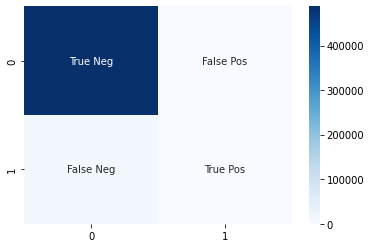

In [6]:
W = uni_set.iloc[:, [9, 19]].values
z = uni_set.iloc[:, -1].values

W_train, W_test, z_train, z_test = train_test_split(W, z, test_size=0.20, random_state = 0)

sc = StandardScaler()
W_train = sc.fit_transform(W_train)
W_test = sc.transform(W_test)

classifier = GaussianNB()
classifier.fit(W_train, z_train)

z_pred = classifier.predict(W_test)

cf_matrix = confusion_matrix(z_test, z_pred)

labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Blues')
print(cf_matrix)
print(accuracy_score(z_test, z_pred))
print(classification_report(z_test, z_pred))

[[485455   2274]
 [  6016   4806]]
0.9833718115097553
              precision    recall  f1-score   support

       False       0.99      1.00      0.99    487729
        True       0.68      0.44      0.54     10822

    accuracy                           0.98    498551
   macro avg       0.83      0.72      0.76    498551
weighted avg       0.98      0.98      0.98    498551



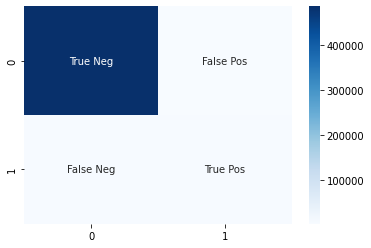

In [7]:
X = uni_set.iloc[:, [9, 19]].values
y = uni_set.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = KNeighborsClassifier(n_neighbors=20)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)

labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2, 2)
sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Blues')
print(cf_matrix)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

                       County  Category Name  Item Description  \
County               1.000000       0.022153          0.007793   
Category Name        0.022153       1.000000         -0.067484   
Item Description     0.007793      -0.067484          1.000000   
State Bottle Retail  0.006539       0.166407         -0.007543   
University           0.031239       0.052520          0.007978   

                     State Bottle Retail  University  
County                          0.006539    0.031239  
Category Name                   0.166407    0.052520  
Item Description               -0.007543    0.007978  
State Bottle Retail             1.000000   -0.013305  
University                     -0.013305    1.000000  


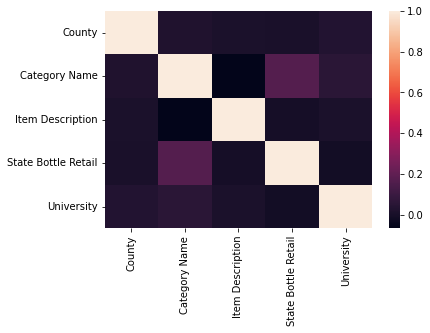

In [8]:
uni_set = uni_set.drop(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address', 'Store Location', 'County Number', 'Category', 'Vendor Number', 'Vendor Name', 'Item Number', 'Pack',
             'Bottle Volume (ml)', 'State Bottle Cost', 'Bottles Sold', 'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)', 'Zip Code', 'City'], axis = 1)

uni_set = uni_set[uni_set['Category Name'].notna()]

enc = OrdinalEncoder()
sc = StandardScaler()

uni_set[['County']] = enc.fit_transform(uni_set[['County']])
uni_set[['Category Name']] = enc.fit_transform(uni_set[['Category Name']])
uni_set[['Item Description']] = enc.fit_transform(uni_set[['Item Description']])
uni_set_scale = sc.fit_transform(uni_set.to_numpy())
uni_set_scale = pd.DataFrame(uni_set_scale)
uni_set_scale.columns = ['County', 'Category Name', 'Item Description', 'State Bottle Retail', 'University']

#print(" \nCount total NaN at each column in a DataFrame : \n\n", df.isnull().sum())

#print(uni_set.head(15))

correlation = uni_set_scale.corr()
print(correlation)
sns.heatmap(correlation)
plt.show()